In [2]:
import keras 
from keras.models import Sequential #whether you create ann,cnn,nn,rnn u have to import this because it is responsible for creating nn
from keras.layers import Dense # 
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout#regulariztion aparameter
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 


In [3]:
!pip install tensor-dash

In [5]:
!git clone https://github.com/CleanPegasus/TensorDash.git

Cloning into 'TensorDash'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 1332 (delta 68), reused 88 (delta 38), pack-reused 1192
Receiving objects: 100% (1332/1332), 7.33 MiB | 5.19 MiB/s, done.
Resolving deltas: 100% (606/606), done.


In [6]:
%cd /content/TensorDash

/content/TensorDash


In [8]:
!python setup.py install

/usr/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'authors'
  warnings.warn(msg)
running install
running bdist_egg
running egg_info
creating tensor_dash.egg-info
writing tensor_dash.egg-info/PKG-INFO
writing dependency_links to tensor_dash.egg-info/dependency_links.txt
writing requirements to tensor_dash.egg-info/requires.txt
writing top-level names to tensor_dash.egg-info/top_level.txt
writing manifest file 'tensor_dash.egg-info/SOURCES.txt'
package init file 'tensordash/__init__.py' not found (or not a regular file)
writing manifest file 'tensor_dash.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying tensordash/firebasedata.py -> build/lib/tensordash
creating build/lib/tensordash/__pycache__
copying tensordash/__pycache__/fastdash.cpython-37.pyc -> build/lib/tensordash/__pycache__
copying tensordash/__pycache__/firebase_data.cpython-38.pyc -> build/lib/tensordash/__pycache__
copy

In [19]:

!pip install firebasedata

  Using cached https://files.pythonhosted.org/packages/27/c2/53ebd81be0205bbb2d86ffe87c5dcd810ec428e6c11558e4f28ff4ef4226/FirebaseData-0.6.1-py3-none-any.whl


**This is the dataset from bank , to predict whether the customer will exit the bank in future or not , so that the bank can not leave them they can hold by providing some benefitial**

In [ ]:
!python /content/TensorDash/setup.py install

In [1]:
from tensordash.tensordash import Tensordash
histories = Tensordash(
    ModelName = 'Remote Monitoring',
    email = 'edugan28@gmail.com')

Enter Tensordash Password :··········


In [5]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# I dont want row no cust ID and sur name bcz they are not going to play a role , here 
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=False)#drop first is the no of columns u want , if it is false , it will take column= no of categories , if it is true it will take column= no of categories - 1
gender=pd.get_dummies(x['Gender'],drop_first=True)# her ewe have m / f , so turning to 1 column , this drop_first true means it will reduce the column ie 2 categories to 1 

In [10]:
geography.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [11]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [12]:
## Concatenate the Data Frames
x=pd.concat([x,geography,gender],axis=1)


In [13]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [15]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [36]:
from keras.layers import Dropout

In [17]:
# now we do feature scaling because , to reudce computation 
# the feature value are higher and so we reduvce to one commone scale 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Initialising the ANN
classifier = Sequential()# this is empty NN currently

In [38]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=10, kernel_initializer = 'he_uniform',activation='relu',input_dim = 12))
## first hidden layer 
# units=6 is the no of hidden unit in first hidden layer 
#kernel_initializer= 'he_uniform' it is the weight initialization - root of 6/fan_in
# no of input_dim = 12 ie 12 features 


In [39]:
# Adding the second hidden layer
classifier.add(Dense(units=10, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
# no of hidden unit in 2nd layer is 6 
classifier.add(Dense(units=20, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.5))


In [40]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
# so here the waight initilization changes to glorotuniform or xavier ie init= 'he_uniform' it is the weight initialization - root of 6/fan_in+fan_out
#no of output unit is 1 


In [41]:
#summary 
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
________________________________________________________

In [42]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#prefer using binary_crossentropy if you use sigmoid in o/p unit oor if hte o/p is binary categorical 
# if u have more than one category then prefer using " CATEGORICAL_CROSSENTROPY"

In [43]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 15, epochs= 30,callbacks=[histories])

Epoch 1/30
358/358 [==============================] - 1s 3ms/step - loss: 0.6404 - accuracy: 0.7184 - val_loss: 0.5038 - val_accuracy: 0.7955
Epoch 2/30
358/358 [==============================] - 2s 5ms/step - loss: 0.5283 - accuracy: 0.7863 - val_loss: 0.4743 - val_accuracy: 0.7955
Epoch 3/30
358/358 [==============================] - 2s 5ms/step - loss: 0.4947 - accuracy: 0.7944 - val_loss: 0.4632 - val_accuracy: 0.7955
Epoch 4/30
358/358 [==============================] - 2s 5ms/step - loss: 0.4784 - accuracy: 0.7985 - val_loss: 0.4524 - val_accuracy: 0.7952
Epoch 5/30
358/358 [==============================] - 2s 5ms/step - loss: 0.4691 - accuracy: 0.7968 - val_loss: 0.4453 - val_accuracy: 0.7955
Epoch 6/30
358/358 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.8022 - val_loss: 0.4384 - val_accuracy: 0.7955
Epoch 7/30
358/358 [==============================] - 2s 5ms/step - loss: 0.4529 - accuracy: 0.8039 - val_loss: 0.4329 - val_accuracy: 0.8016
Epoch 

ONE EPOCH IS ONE FULL ACCESS TO DATA POINTS 
SO 
IN ONE EPOCH , 10 DATA POINTS ARE SELECTED AND COMPUTED LOSS AND BACKPROB TO REDUCE THEN ANOTHER 10 IS SELECTED COMPUTED LOSS AND REDUCE IT 
UNTILL ALL THE DATA POINT ARE ACCESSED 

In [ ]:
# HERE YOU CAN SEE IT HAS LOW BIAS AND LOW VARIANCE 
# BIAS = ERROR IS TRAIN DATA 
# VARIANCE = ERROR IN TEST DATA 
# SO BY SEEING THE VAL_LOSS AND LOSS , BOTH ARE LOW 

# AND , WE GOT BOTH THE VAL AND ACC AS APPOX EQUAL 

# AND BY SELECTING CRT WEIGHT INIT , THE OPTIMIZER THIS IS THE GOOD RESULT 


In [44]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

In [45]:
y_pred

array([[0.20278078],
       [0.3297844 ],
       [0.17389452],
       ...,
       [0.31812918],
       [0.21670434],
       [0.22677556]], dtype=float32)

In [46]:
# so we use sigmoid the y_pred will be 0 - 1 
# i use one condition to know it is 0 or 1 
y_pred=y_pred>0.5 # true if > 0.5 else false 
# so true means 1 false means 0 


In [47]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[1567,   28],
       [ 251,  154]])

In [50]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [51]:
score  # the accuracy is 0.85 but we can try to increase it 

0.8605

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


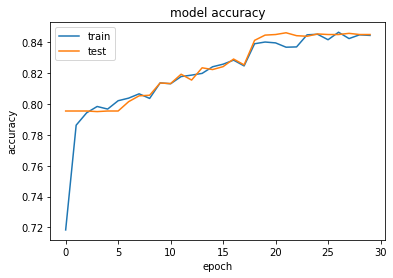

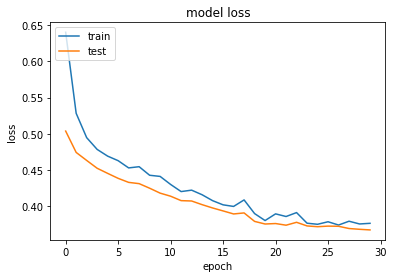

In [52]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# INCREASING THE ACCURACY IF POSSIBLE 
# Initialising the ANN
classifier_new = Sequential()# this is empty NN currently

In [ ]:
classifier_new.add(Dense(units=20, kernel_initializer = 'he_normal',activation='relu',input_dim = 12))
classifier_new.add(Dropout(0.3))
classifier_new.add(Dense(units=20, kernel_initializer='he_normal',activation='relu'))
classifier_new.add(Dropout(0.2))
classifier_new.add(Dense(units=15, kernel_initializer='he_normal',activation='relu'))
classifier_new.add(Dropout(0.3))
classifier_new.add(Dense(units=10, kernel_initializer='he_normal',activation='relu'))
classifier_new.add(Dropout(0.1))
classifier_new.add(Dense(units=1, kernel_initializer='glorot_normal',activation='sigmoid'))

In [ ]:
classifier_new.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 20)                260       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 15)                315       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

In [ ]:
# Compiling the ANN
classifier_new.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Fitting the ANN to the Training set
model_history_new=classifier_new.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 213us/step - loss: 0.6100 - accuracy: 0.7313 - val_loss: 0.5104 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 171us/step - loss: 0.5118 - accuracy: 0.7925 - val_loss: 0.4788 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 169us/step - loss: 0.4884 - accuracy: 0.7981 - val_loss: 0.4560 - val_accuracy: 0.7974
Epoch 4/100
5359/5359 [==============================] - 1s 166us/step - loss: 0.4796 - accuracy: 0.7970 - val_loss: 0.4490 - val_accuracy: 0.7948
Epoch 5/100
5359/5359 [==============================] - 1s 171us/step - loss: 0.4615 - accuracy: 0.8054 - val_loss: 0.4361 - val_accuracy: 0.8027
Epoch 6/100
5359/5359 [==============================] - 1s 171us/step - loss: 0.4458 - accuracy: 0.8072 - val_loss: 0.4277 - val_accuracy: 0.8054
Epoch 7/100
5359/5359 [==============================] - 1s 173us/step

In [ ]:
y_pred = classifier_new.predict(X_test)
y_pred=y_pred>0.5
acc=accuracy_score(y_pred,y_test)


In [ ]:
acc

0.8665

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


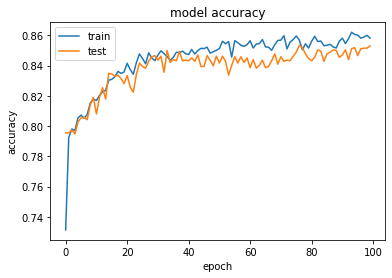

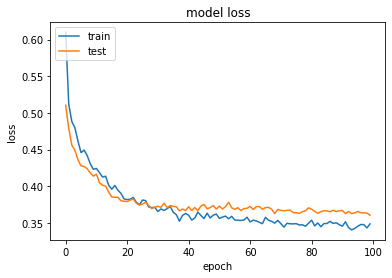

In [ ]:
# list all data in history

print(model_history_new.history.keys())

#print(model_history_new.history)
# summarize history for accuracy
plt.plot(model_history_new.history['accuracy'])
plt.plot(model_history_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history_new.history['loss'])
plt.plot(model_history_new.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()